# Статистика, DS-поток
## Задание S.9

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.**

Теория:
* Задача T1 &mdash; 30 баллов;
* Задача T2 &mdash; 10 баллов;
* Задача T3 &mdash; 10 баллов;

Практика:
* Задача P1 &mdash; 70 баллов;
* Задача P2 &mdash; 50 баллов;
* Задача P3 &mdash; 50 баллов;
* Задача P4 &mdash; 10 баллов;
* Задача P5 &mdash; 30 баллов.

Задачи разных типов учитываются в разных рейтингах.

**Важность задач:**

* *высокая:* задачи T1, P1-P4;
* *средняя:* задача T2, P5;
* *обычная:* задача T3.

Задачи расставлены в том порядке, в котором их наиболее логично выполнять.

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Исправил формулу для p-value</font></b>
  * <b><font color="#00b565" size="3">Исправил значение c_alpha</font></b>

* <b><font size="4">Задача 2</font></b>
  * <b><font color="#00b565" size="3">Добавил более подробный ответ на вопрос</font></b>

* <b><font size="4">Задача 3</font></b>
  * <b><font color="#00b565" size="3">Добавил пояснения к выбору размера выборки</font></b>
  * <b><font color="#00b565" size="3">Добавил пояснения к мощности критерия Жарка-Бера</font></b>

* <b><font size="4">Задача 5</font></b>
  * <b><font color="#00b565" size="3">Пояснил условия применимости критерия</font></b>
  * <b><font color="#00b565" size="3">Исправил формулу критерия хи-квадрат</font></b>



In [1]:
# Bot check

# HW_ID: ds_s9
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

---
### Задача T1.

**1.** Посчитайте p-value для критерия из задачи 10 предыдущего домашнего задания.
	
**2.** Посчитайте p-value для критерия из задачи 3 предыдущего домашнего задания, используя определение p-value через семейство критериев для разных уровней значимости.

**3.** Пусть $X = (X_{1}, ..., X_{n})$ &mdash; выборка из распределения $Exp(\theta)$. Для проверки гипотез $\mathsf{H}_0\colon \theta = 1\ vs.\ \mathsf{H}_1\colon\theta \ne 1$ рассмотрим критерий $S = \left\{\sum x_i < u_{\alpha / 3}\right\} \cup \left\{\sum x_i > u_{1 - 2\alpha / 3}\right\},$ где $u_p$ &mdash; $p$-квантиль $\Gamma(1, n).$
Посчитайте p-value для данного критерия.
	
*Замечание.* Критерий в пункте 3 может быть полезен, если для нас отклонения $\theta$ в большую сторону более значимо, чем отклонению в меньшую.

_____
### Задача P1.

Вспомним задачу из предыдущего практического задания. Напомним формулировку.

Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; результаты работы модели на тестовой выборке, где $X_i = 1$, если для $i$-го объекта модель правильно определила класс, а $p$ &mdash; неизвестная вероятность такого события. 
Мы хотим проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает, что построенный классификатор выдает рандомный ответ, а первая &mdash; что чаще все же выдает верный ответ.

Укажите равномерно наиболее мощный критерий и определите для него p-value.

S = $\{ \sum\limits_{i=1}^{n} X_i > c_{1-\alpha} \}$, где $c_{1 - \alpha}$ -- $(1 - \alpha)$ квантиль Binom(n, 1/2)

Пусть t -- реализация статистики. Тогда p-value определяется так:

$$
\text{p-value(t)} = P_{1/2}\left(\sum\limits_{i=1}^{n} X_i > t \right) = \sum\limits_{i=t}^{n} \binom{n}{i}p^i(1-p)^{n-i}
$$

Проведите несколько экспериментов аналогично предыдущему заданию, дополнив таблицу значениями p-value.

*Замечание:* Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

<b><font color="#00b565" size="5">Исправил формулу для p-value</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b> В формуле для p-value строгий знак. Комм. В подсчете p-value .sf(t) (равносильна строгому знаку), надо взять  t - 0.5.


In [3]:
def test_hypothesis(n_values, p, alpha=0.05):
    """
    Проверяет H_0: p = 1/2 против H_1: p > 1/2 для нескольких размеров выборки
    
    Параметры:
    -----------
    n_values : array-like
        Массив размеров выборок для тестирования
    p : float
        Истинное значение параметра вероятности для генерации данных
    alpha : float, optional
        Уровень значимости (по умолчанию 0.05)
        
    Возвращает:
    --------
    pd.DataFrame
        DataFrame с результатами тестирования
    """
    T_values = np.random.binomial(n=n_values, p=p)
    c_alpha = sps.binom.ppf(1 - alpha, n=n_values, p=1/2)
    pvalue = 1 - sps.binom.cdf(T_values - 0.5, n=n_values, p=1/2)
    pvalue = np.round(pvalue, 3)
    
    info_df = pd.DataFrame({
        'n': n_values,
        'T(X)': T_values,
        'c_alpha': c_alpha,
        'H_0 reject': (T_values > c_alpha).astype(int),
        'p-value': pvalue.astype(float)
    })
    
    print(fr"Проверка гипотезы H_0 при p = {p}")
    return info_df

n_values = np.array([10, 100, 1000, 10000, 100000])
test_hypothesis(n_values, p=0.55)


Проверка гипотезы H_0 при p = 0.55


,n,T(X),c_alpha,H_0 reject,p-value
0,10,4,8.0,0,0.828
1,100,58,58.0,0,0.067
2,1000,545,526.0,1,0.002
3,10000,5504,5082.0,1,0.000
4,100000,55162,50260.0,1,0.000


<b><font color="#00b565" size="5">Конец исправлений</font></b>


Как видим, гипотеза $H_0$ действительно отвергается при p-value < $\alpha$

Представьте себя заказчиком. Каким должно быть истинное значение $p$, чтобы с точки зрения практики можно было бы считать, что связь между черным котом и неудачей имеется? 

Если поэксперементировать с кодом выше, то можно заметить, что практически это начинает проявлять при $p \approx 0.55$

Традиционный вопрос заказчика &mdash; сколько необходимо провести экспериментов? Заказчик не хочет долго ждать, но хочет, чтобы у вашего критерия была достаточная мощность.

Для начала сгенерируйте 10 выборок для двух случаев: 
1. $n=5, p=0.75$; 
2. $n=10^5, p=0.51$. 

В каждом случае в виде таблицы выведите 
* реализацию статистики $T(X)$,
* соответствующее p-value,
* 0/1 &mdash; отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

In [4]:
n_first = 5
p_first = 0.75

n_second = 10**5
p_second = 0.51

test_hypothesis(n_values=[n_first] * 10, p=p_first)

Проверка гипотезы H_0 при p = 0.75


,n,T(X),c_alpha,H_0 reject,p-value
0,5,3,4.0,0,0.500
1,5,3,4.0,0,0.500
2,5,4,4.0,0,0.188
3,5,4,4.0,0,0.188
4,5,4,4.0,0,0.188
5,5,5,4.0,1,0.031
6,5,4,4.0,0,0.188
7,5,5,4.0,1,0.031
8,5,3,4.0,0,0.500
9,5,3,4.0,0,0.500


In [5]:
test_hypothesis(n_values=[n_second] * 10, p=p_second)


Проверка гипотезы H_0 при p = 0.51


,n,T(X),c_alpha,H_0 reject,p-value
0,100000,51003,50260.0,1,0.0
1,100000,50821,50260.0,1,0.0
2,100000,50909,50260.0,1,0.0
3,100000,50892,50260.0,1,0.0
4,100000,51219,50260.0,1,0.0
5,100000,51022,50260.0,1,0.0
6,100000,50970,50260.0,1,0.0
7,100000,51005,50260.0,1,0.0
8,100000,50977,50260.0,1,0.0
9,100000,50965,50260.0,1,0.0


**Вывод:** Видим размер эффекта. При большой выборке отклоняются величины, хоть немного отличающиеся от $H_0$ -- в этом проявляется переобучение

Аналогично, в первом случае почти ничего не отклоняется в этом проявляется недообучение

Теперь разберемся с тем, как подобрать оптимальный размер выборки.

1. Зафиксируйте значение $p^* > 1/2$, которое на практике обычно называется *минимальным детектируемым эффектом*. Оно должно обладать следующими свойствами.
    - Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть новая модель действительно работает лучше.
    - В противном случае отклонение с практической точки зрения признается несущественным.
2. Для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
3. Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

<b><font color="#00b565" size="5">Исправил значение c_alpha</font></b>

<b><font color="#00b565" size="5">Замечание: </font></b> Ошибка в c_alpha. Комм. Истинное значение c_alpha = 1 + u_{1 - alpha} (и u_{1 - alpha} в некоторых случаях).


In [ ]:
def power_function(p, n, alpha=0.05):
    c_alpha = sps.binom(n=n, p=0.5).ppf(1 - alpha) + 1
    b_S = 1 - sps.binom.cdf(c_alpha, n=n, p=p)
    return b_S

<b><font color="#00b565" size="5">Конец исправлений</font></b>

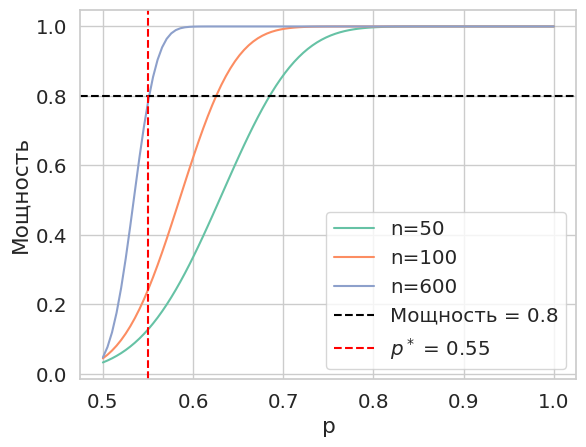

In [7]:
p_star = 0.55

n_values = np.array([50, 100, 600])
p_values = np.linspace(0.5, 1, 100)

for n in n_values:
    power_values = [power_function(p, n) for p in p_values]
    plt.plot(p_values, power_values, label=f"n={n}")

plt.axhline(0.8, color="black", linestyle="--", label="Мощность = 0.8")
plt.axvline(p_star, color="red", linestyle="--", label=rf"$p^*$ = {p_star}")

plt.xlabel("p")
plt.ylabel("Мощность")
plt.legend()
plt.show()

Из графика видно, что $n^* = 600$

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 
 1. $1/2 < p < p^*$; 
 2. $p > p^*$.

In [8]:
n_star = 600
test_hypothesis(n_values=[n_star] * 10, p=(0.5 + p_star) / 2)

Проверка гипотезы H_0 при p = 0.525


,n,T(X),c_alpha,H_0 reject,p-value
0,600,322,320.0,1,0.040
1,600,321,320.0,1,0.047
2,600,304,320.0,0,0.388
3,600,294,320.0,0,0.702
4,600,319,320.0,0,0.065
5,600,319,320.0,0,0.065
6,600,335,320.0,1,0.002
7,600,327,320.0,1,0.015
8,600,315,320.0,0,0.118
9,600,314,320.0,0,0.135


In [9]:
test_hypothesis(n_values=[n_star] * 10, p=(p_star + 0.7) / 2)

Проверка гипотезы H_0 при p = 0.625


,n,T(X),c_alpha,H_0 reject,p-value
0,600,394,320.0,1,0.0
1,600,354,320.0,1,0.0
2,600,388,320.0,1,0.0
3,600,371,320.0,1,0.0
4,600,361,320.0,1,0.0
5,600,370,320.0,1,0.0
6,600,361,320.0,1,0.0
7,600,376,320.0,1,0.0
8,600,362,320.0,1,0.0
9,600,381,320.0,1,0.0


**Вывод:** Как видим, теперь проверка статистики приобретает корректный характер, как с теоретической, так и с практической точки зрения. При $p>p^*$, мы отвергаем $H_0$, а в случае когда p слабо отличается от $p^*$ $H_0$ отвергается редко.

_____
### Задача P2.

Рассмотрим выборку $X = (X_{1}, ..., X_{n}) \sim \mathcal{N}(\theta, 1)$. Проверяются гипотезы $\mathsf{H}_0\colon\ \theta = 0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta\ > 0$.

Выпишите равномерно наиболее мощный критерий, который получен в предыдущем домашнем задании.

$S = \{T(X) > c_{1 - \alpha}\}$, где $T(X) = \sum\limits^{n}_{i=1} X_i \ \sim N(n\theta, n)$, $c_{1 - \alpha}$ -- $(1 - \alpha)$ - квантиль $N(n\theta, n)$.

Найдем p-value. Пусть t -- реализация статистики. Тогда:
$$
\text{p-value(t)} = 1 - F_{0}(T(X))
$$
где $F_0$ -- функция распределения N(0, n).

На практике если предполагается, что распределение статистики критерия $T(X)$ одинаково и непрерывно, то перед применением критерия можно проверить его на корректность следующим образом.
1. Генерируется множество искусственных выборок в предположении справедливости $\mathsf{H}_0$. 
2. По каждой из выборок вычисляется p-value.
3. По всем p-value строится гистограмма, которая визуально проверяется на равномерность.

В AB-тестировании такая процедура часто носит название *AA-тестирование*.

Проверим корректность нашего критерия. Конечно, у нас случай довольно простой, тут и так "все понятно", но стоит отработать навык проверки.
Проведите эксперимент на $10^6$ выборок размера 100 и постройте гистограмму.

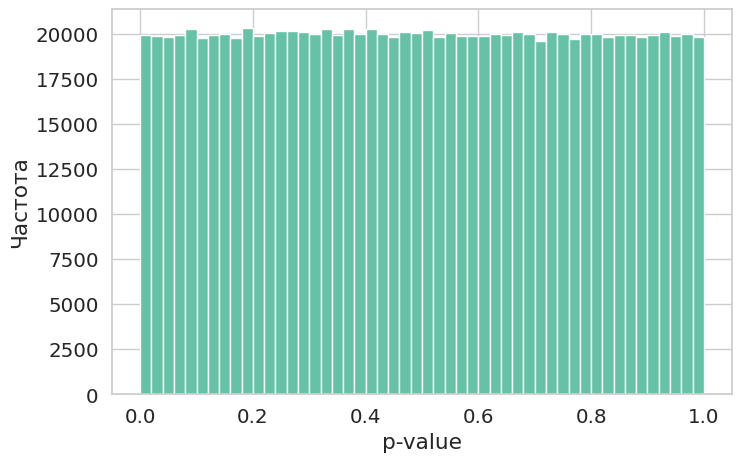

array([0.86505409, 0.81183856, 0.88497606, ..., 0.26928655, 0.1356003 ,
       0.72039423])

In [10]:
def plot_pvalue_distribution(sample_size=100, sample_count=10**6, theta_generated = 0):
    samples = sps.norm(loc = theta_generated).rvs(size=(sample_count, sample_size))
    Z_stats = samples.sum(axis=1)
    pvalues = 1 - sps.norm.cdf(Z_stats, scale=np.sqrt(sample_size))

    plt.figure(figsize=(8, 5))
    plt.hist(pvalues, bins=50)
    plt.xlabel("p-value")
    plt.ylabel("Частота")
    plt.show()
    return pvalues

plot_pvalue_distribution()

Как видим $p(T(X)) \sim U[0, 1] \Rightarrow$  построенный критерий верен.

Как известно, критерий не меняется при рассмотрении сложной основной гипотезы $\mathsf{H}_0\colon\ \theta \leqslant 0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta\ > 0$.

Повторите эксперимент для истинного $\theta=-0.1$.

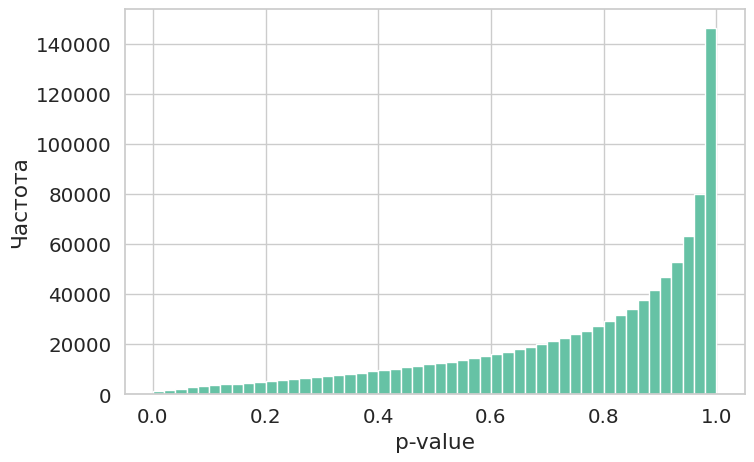

array([0.51395811, 0.99857284, 0.97279152, ..., 0.92913477, 0.87514883,
       0.7990818 ])

In [11]:
plot_pvalue_distribution(theta_generated=-0.1)

Видим, что распределение не равномерно.

*Замечание.* Подобный эффект все равно не дает оснований говорить об уверенности $\mathsf{H}_0$, поскольку критерий может быть недостаточно мощным.

Проверьте, как ведет себя p-value для альтернативы, рассмотрев истинную $\theta=0.1$.

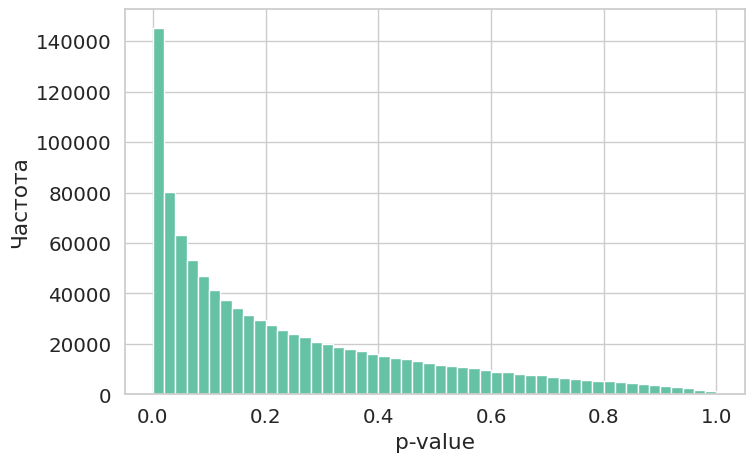

In [12]:
pvalues = plot_pvalue_distribution(theta_generated=0.1)

Как видим, здесь не имеет смысла говорить о равномерности распределения

<b><font color="#00b565" size="5">Добавил более подробный ответ на вопрос</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b>Нет ответа на вопрос. Комм. На вопрос: "Чему соответствует доля случаев, в которых p-value меньше 0.05?" ответа нет или он неверный, или он не очень полный(явных слов про мощность нет). 


Чему соответствует доля случаев, в которых p-value меньше 0.05?

In [13]:
n_p_less_005 = np.sum(pvalues < 0.05)
print(f"Доля случаев, в которых p-value меньше 0.05: {n_p_less_005 / len(pvalues)}")

Доля случаев, в которых p-value меньше 0.05: 0.258858


Как видим, наш критерий обладает в данном случае достаточно низкой мощностью

<b><font color="#00b565" size="5">Конец исправлений</font></b>


**Вывод:** Как видим, теперь уже нельзя говорить, что мы имеем дело с равномерным распределением, таким образом, для данного случая наш критерий не корректен.

В работе был реализован метод проверки критерия при помощи распределения p-value.

__________________
### Задача P3.

На лекциях и семинарах были разобраны следующие критерии проверки нормальности:
* Колмогорова;
* Жарка-Бера;
* Шапиро-Уилка.

Cуществует модификация критерия Колмогорова для проверки нормальности — <a href="https://ru.wikipedia.org/wiki/Критерий_Лиллиефорса"> Критерий Лиллиефорса.</a> При решении задачи можете воспользоваться им, например, взяв реализацию из библиотеки `statsmodels`: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html">`statsmodels.stats.diagnostic.lilliefors`</a>, или же применять для конкретной $F_0$ критерий Колмогорова, пример использования которого можно найти в ноутбуке с лекции.

**1.** Данные критерии являются асимптотическими, и их реальное значение уровня значимости может отличаться от желаемого числа $\alpha=0.05$. На семинарах разобран метод оценки реального уровня значимости критерия. Посчитайте реальный уровень значимости этих критериев для размеров выборки от 5 до 100.

*Подсказка:*

In [14]:
# max_sample_size = ...
# sample_count = ...
# is_reject_<критерий> = np.zeros((max_sample_size, sample_count))

# for i in tqdm(range(max_sample_size)):
#     for j in range(sample_count):
#         sample = ...
#         is_reject_<критерий>[i, j] = ...

Ваша реализация:

In [15]:
from statsmodels.stats.diagnostic import lilliefors

max_sample_size = 100
sample_count = 1000
alpha = 0.05

is_reject_kolmogorov = np.zeros((max_sample_size, sample_count))
is_reject_jarque_bera = np.zeros((max_sample_size, sample_count))
is_reject_shapiro_wilk = np.zeros((max_sample_size, sample_count))
is_reject_lilliefors = np.zeros((max_sample_size, sample_count))

for i in tqdm(range(max_sample_size)):
    for j in range(sample_count):
        sample = sps.norm.rvs(size=i + 5)
        is_reject_kolmogorov[i, j] = sps.kstest(sample, cdf=sps.norm(loc=0, scale=1).cdf)[1] < alpha
        is_reject_jarque_bera[i, j] = sps.jarque_bera(sample)[1] < alpha
        is_reject_shapiro_wilk[i, j] = sps.shapiro(sample)[1] < alpha
        is_reject_lilliefors[i, j] = lilliefors(sample)[1] < alpha

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

<b><font color="#00b565" size="5">Добавил пояснения к выбору размера выборки</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b> Используется 1е3, без указания получаемой точности.

Поясните, почему вы выбрали такое значение `sample_count`.

**Ответ:** Задача с семинара &mdash; чтобы обеспечить точность $0.05\pm0.001$ нужно взять порядка $200000$ итераций. Тут в решении берется меньше, поскольку считается долго. В работе в теоретических пояснениях хотелось бы $200000$, в реализации не меньше $10^4$</i>

<b><font color="#00b565" size="5">Конец исправлений</font></b>


Нарисуйте на одном графике зависимость реального уровня значимости от размера выборки для каждого критерия. Пунктиром отметьте уровень 0.05. Не забудьте добавить легенду и подписать оси.

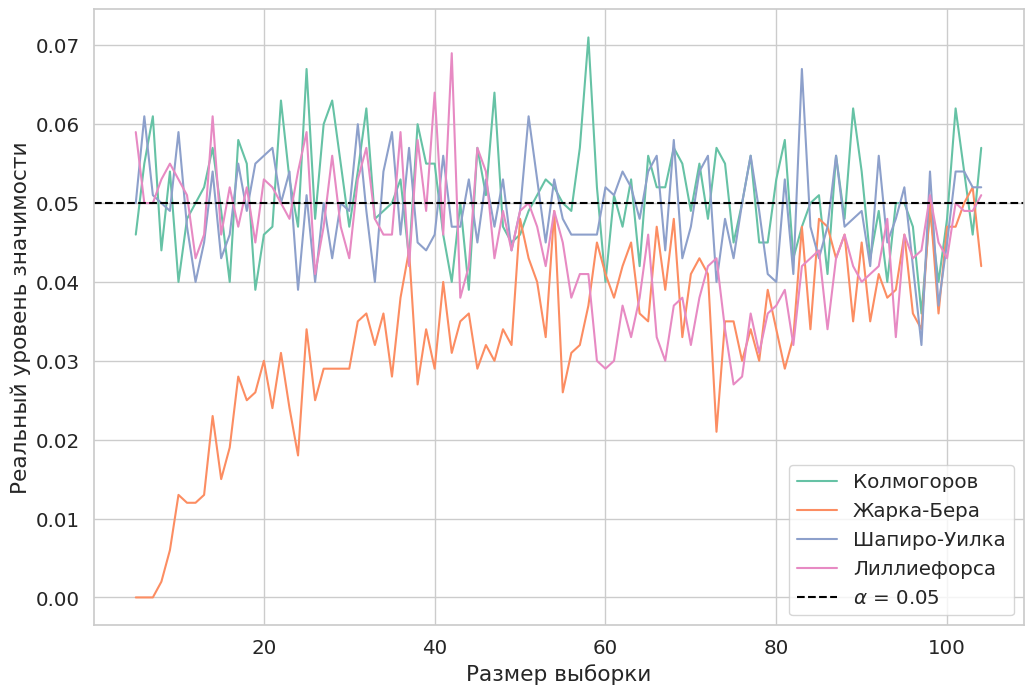

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(np.arange(5, max_sample_size + 5), is_reject_kolmogorov.mean(axis=1), label="Колмогоров")
plt.plot(np.arange(5, max_sample_size + 5), is_reject_jarque_bera.mean(axis=1), label="Жарка-Бера")
plt.plot(np.arange(5, max_sample_size + 5), is_reject_shapiro_wilk.mean(axis=1), label="Шапиро-Уилка")
plt.plot(np.arange(5, max_sample_size + 5), is_reject_lilliefors.mean(axis=1), label="Лиллиефорса")

plt.axhline(alpha, color="black", linestyle="--", label=fr"$\alpha$ = {alpha}")
plt.xlabel("Размер выборки")
plt.ylabel("Реальный уровень значимости")
plt.legend()
plt.show()

Какой можно сделать вывод?

Как видим реальный уровень значимости находится в окрестности 0.05. Причем по графику не видна какая-либо зависимость реального уровня значимости от размера выборки.

**2.** Аналогичным образом можно вычислять мощность критерия. Вычислите мощности критериев для размеров выборки от 5 до 100, если альтернативная гипотеза заключается в том, что выборка имеет стандартное распределение Коши. Иначе говоря, для критерия $S$ надо приближенно посчитать $\beta_S(\mathsf{P})$, где $\mathsf{P}$ — стандартное распределение Коши.

Нарисуйте на одном графике зависимость мощности критерия от размера выборки для каждого критерия. Не забудьте добавить легенду и подписать оси.


In [ ]:
from statsmodels.stats.diagnostic import lilliefors

max_sample_size = 100
sample_count = 1000
alpha = 0.05

power_kolmogorov = np.zeros((max_sample_size, sample_count))
power_jarque_bera = np.zeros((max_sample_size, sample_count))
power_shapiro_wilk = np.zeros((max_sample_size, sample_count))
power_lilliefors = np.zeros((max_sample_size, sample_count))

for i in tqdm(range(max_sample_size)):
    for j in range(sample_count):
        sample = sps.cauchy.rvs(size=i + 5)
        power_kolmogorov[i, j] = sps.kstest(sample, cdf=sps.norm.cdf)[1] < alpha
        power_jarque_bera[i, j] = sps.jarque_bera(sample)[1] < alpha
        power_shapiro_wilk[i, j] = sps.shapiro(sample)[1] < alpha
        power_lilliefors[i, j] = lilliefors(sample)[1] < alpha

  0%|          | 0/100 [00:00<?, ?it/s]

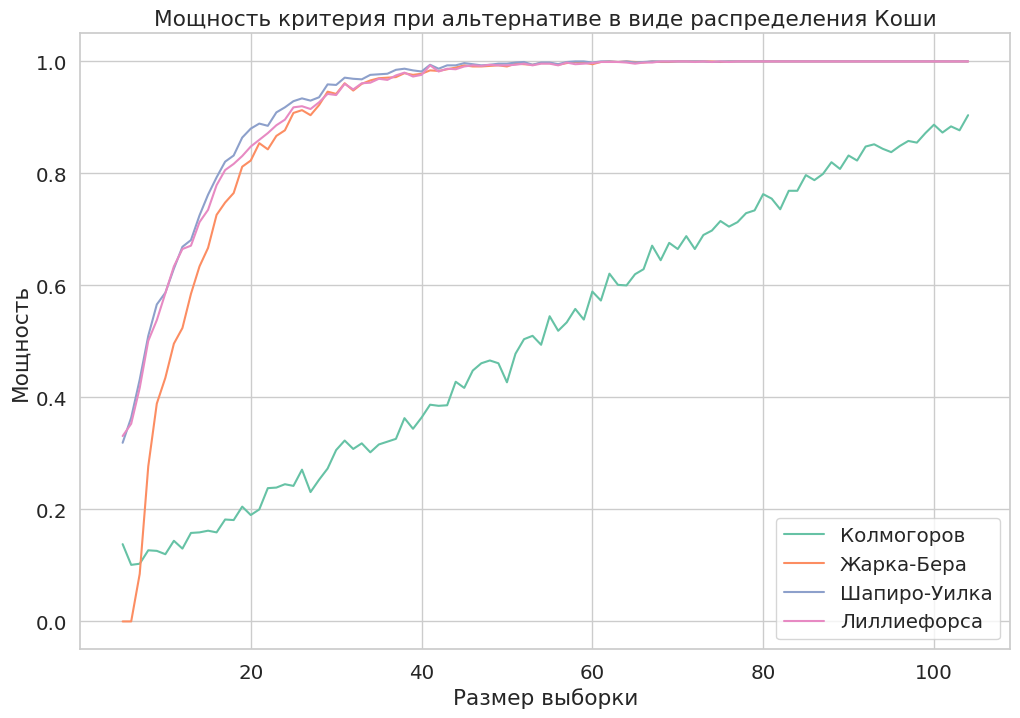

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(np.arange(5, max_sample_size + 5), power_kolmogorov.mean(axis=1), label="Колмогоров")
plt.plot(np.arange(5, max_sample_size + 5), power_jarque_bera.mean(axis=1), label="Жарка-Бера")
plt.plot(np.arange(5, max_sample_size + 5), power_shapiro_wilk.mean(axis=1), label="Шапиро-Уилка")
plt.plot(np.arange(5, max_sample_size + 5), power_lilliefors.mean(axis=1), label="Лиллиефорса")

plt.xlabel("Размер выборки")
plt.ylabel("Мощность")
plt.title("Мощность критерия при альтернативе в виде распределения Коши")
plt.legend()
plt.show()

Сделайте вывод. Какой критерий является наиболее мощным при данной альтернативе?

Из графика видно, что критерий Шапиро-Уилка в среднем является самым мощным критерием при данной альтернативе.

**3.** Распределение Стьюдента является в некотором смысле обобщением нормального распределения (при бесконечном количестве степеней свободы) и распределения Коши (при одной степени свободы). 
Посчитайте приближенно мощности критериев для выборки размера 50 если альтернатива заключается в том, что выборка имеет распределение Стьюдента. Поскольку мощность критерия является функцией от распределения из альтернативной гипотезы, вам нужно посчитать функцию. Посчитайте её значения для целых значений степени свободы от 1 до 10.

Нарисуйте на одном графике зависимость мощности критерия от количества степеней свободы для каждого критерия. Не забудьте добавить легенду и подписать оси.

In [ ]:
from statsmodels.stats.diagnostic import lilliefors

sample_size = 50  
sample_count = 1000 
alpha = 0.05

degrees_of_freedom = np.arange(1, 11)
power_kolmogorov = np.zeros((len(degrees_of_freedom), sample_count))
power_jarque_bera = np.zeros((len(degrees_of_freedom), sample_count))
power_shapiro_wilk = np.zeros((len(degrees_of_freedom), sample_count))
power_lilliefors = np.zeros((len(degrees_of_freedom), sample_count))

for i, df in enumerate(degrees_of_freedom):
    for j in range(sample_count):
        sample = sps.t.rvs(df=df, size=sample_size)
        
        power_kolmogorov[i, j] = sps.kstest(sample, cdf=sps.norm.cdf)[1] < alpha
        power_jarque_bera[i, j] = sps.jarque_bera(sample)[1] < alpha
        power_shapiro_wilk[i, j] = sps.shapiro(sample)[1] < alpha
        power_lilliefors[i, j] = lilliefors(sample)[1] < alpha

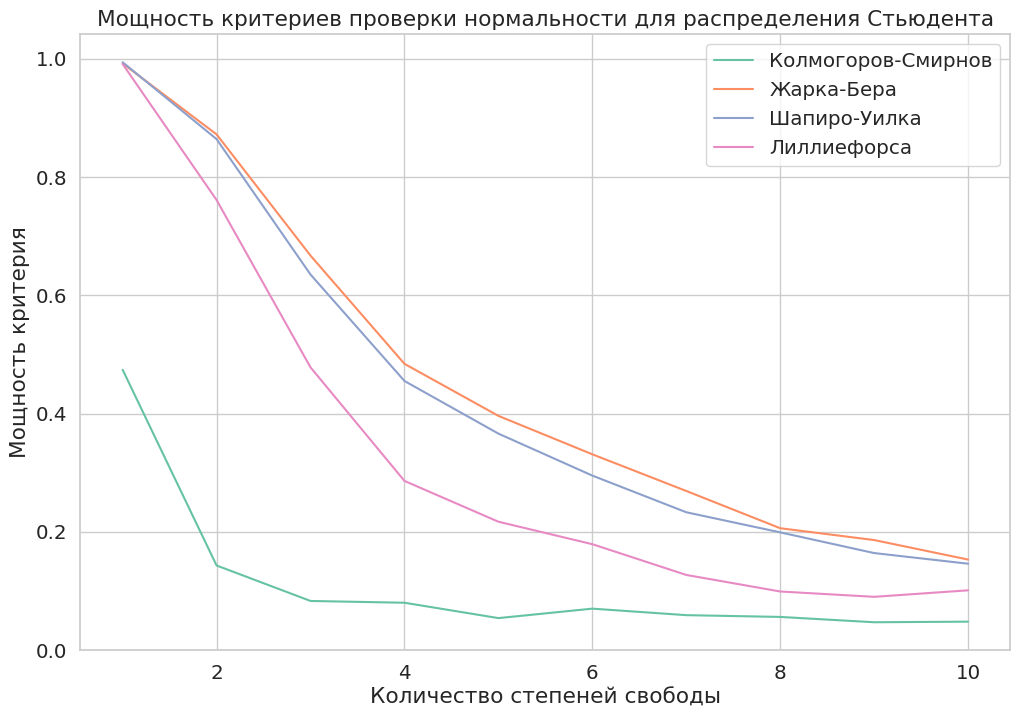

In [ ]:
mean_power_kolmogorov = power_kolmogorov.mean(axis=1)
mean_power_jarque_bera = power_jarque_bera.mean(axis=1)
mean_power_shapiro_wilk = power_shapiro_wilk.mean(axis=1)
mean_power_lilliefors = power_lilliefors.mean(axis=1)

# Построение графика
plt.figure(figsize=(12, 8))
plt.plot(degrees_of_freedom, mean_power_kolmogorov, label="Колмогоров-Смирнов")
plt.plot(degrees_of_freedom, mean_power_jarque_bera, label="Жарка-Бера")
plt.plot(degrees_of_freedom, mean_power_shapiro_wilk, label="Шапиро-Уилка")
plt.plot(degrees_of_freedom, mean_power_lilliefors, label="Лиллиефорса")

plt.xlabel("Количество степеней свободы")
plt.ylabel("Мощность критерия")
plt.legend()
plt.title("Мощность критериев проверки нормальности для распределения Стьюдента")
plt.show()

Сделайте вывод относительно мощности критерия при разных распределениях из альтернативы.

<b><font color="#00b565" size="5">Добавил пояснения к мощности критерия Жарка-Бера</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b>Нет пояснений, почему мощность Жарка-Бера ниже. Комм. т.к. критерий асимптотический.

В силу того, что критерий Жарка-Бера асимптотический его мощность уступает остальным критериям, за исключением критерия Колмогорова.


<b><font color="#00b565" size="5">Конец исправлений</font></b>


Как видим мощности всех критериев при стремлении степеней свободы к $\infty$ стремятся к 0. Это ожидаемо, ведь распределение Стьюдента при увеличении степеней свободы стремится к нормальному, из за чего критериям становится сложнее их отличать.

___
### Задача P4. 
Студенты периодически отправляют запросы в бот. Иногда бот бывает недоступен,
поэтому студенты с некоторыми интервалами повторяют запросы до тех пор, пока
бот не ответит. Известно, что $52$ запроса дошли с первой попытки, $31$ &mdash; со второй, $3$
&mdash; с третьей, а для доставки еще $5$ запросов потребовалось более $4$ попыток. Верно
ли, что бот получает запросы с вероятностью $\frac{2}{3}$?

**Решение:**

Пусть H_0: $Pois(2 / 3)$

In [ ]:
def calculate_MLE(B0, B1, B2, B3, theta):
    p0 = np.exp(-theta)
    p1 = theta * np.exp(-theta)
    p2 = (theta) ** 2 * np.exp(-theta) / 2
    p3 = 1 - p0 - p1 - p2
    return B0 * np.log(p0) + B1 * np.log(p1) + B2 * np.log(p2) + B3 * np.log(p3)

alpha = 0.05

B0 = 52
B1 = 31
B2 = 3
B3 = 5

n = B0 + B1 + B2 + B3

thetas = np.linspace(1e-10, 1, 1000)

theta_hat = thetas[np.argmax(calculate_MLE(B0, B1, B2, B3, thetas))]
print(f"theta_hat = {theta_hat}")
np.argmax(calculate_MLE(B0, B1, B2, B3, thetas))

theta_hat = 0.5805805806225226


580

In [ ]:
p0 = np.exp(-theta_hat)
p1 = theta_hat * np.exp(-theta_hat)
p2 = (theta_hat) ** 2 * np.exp(-theta_hat) / 2
p3 = 1 - p0 - p1 - p2

Теперь рассчитаем p-value.

In [ ]:
observed = np.array([B0, B1, B2, B3])
expected = n * np.array([p0, p1, p2, p3])
chi = np.sum((observed - expected) ** 2 / expected)

pvalue = sps.chi2(df=3).sf(chi)
print(f"pvalue = {pvalue}")

pvalue = 0.03526304520817243


**Вывод:** Как видим p-value оказался меньше 0.05, значит основную гипотезу необходимо отвергнуть. То есть бот не получает запросы с вероятностью 2/3, 


---
### Задача T2.
Компания по производству кормов для собак провела исследование о том, какой корм предпочитают их питомцы из 4 сортов на выбор: со вкусом лосося, со вкусом курицы, со вкусом говядины и корм с овощами. Менеджеры компании преполагают, что предпочтения будут равны соответственно $\theta, \theta, 2\theta, 1-4\theta$,
	где $\theta\in(0,1/4)$. Однако по результатам опроса $5000$ владельцев собак оказалось, что предпочтение соответственно следующие: $1010$, $2200$, $950$ и $840$ собак. Верно ли предположение менеджеров? Статистически аргументируйте свой ответ. 

**Решение:**



In [ ]:
data = np.array([1010, 2200, 950, 840])
MLE_theta = 0.208
p_MLE = np.array([MLE_theta, MLE_theta, 2 * MLE_theta, 1 - 4 * MLE_theta])
n = 5000

CHI_MLE = np.sum((data  - n * p_MLE) ** 2 / (n * p_MLE))
print(f"Реализация статистики равна {CHI_MLE:.2f}")
print(f"p-value = {sps.chi2(df=3).sf(CHI_MLE)}")

Реализация статистики равна 1908.61
p-value = 0.0


____
### Задача P5.

С помощью критерия хи-квадрат вам нужно проверить, правильно ли `scipy.stats` генерирует случайные величины. 

**1.** Реализуйте критерий для генерации выборки $U\{1, ..., 10\}$, аналогично разобранному на семинаре. Тем самым проверьте, что `sps.randint` действительно генерирует выборку из равномерного распределения.

**2.** Проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. 

**Указания**
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления плотности воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код в отдельной ячейке для *конкретной* реализации выборки. Так вам проще реализовать, а нам проще проверять.

**Решение:**

<b><font color="#00b565" size="5">Пояснил условия применимости критерия</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b> Ничего не сказано про условия применимости критерия. 


В данной задаче можно применить критерий хи-квадрат, так как мы будем иметь дело с достаточно большими выборками.

<b><font color="#00b565" size="5">Конец исправлений</font></b>

1.

In [25]:
SIZE = 1000
numbers = sps.randint(low = 1, high = 11).rvs(size=SIZE)
unique_nums = np.unique(numbers, return_counts=True) # Найдем количество каждого числа

# Для любого j, p_j = 1/10
p = 1/10 

CHI_sample = np.sum((unique_nums[1] - SIZE * p) ** 2 /  (SIZE * p))

#Посчитаем p-value

p_value = sps.chi2(df=9).sf(CHI_sample)
print(f"p-value равно {p_value:.2f}")

p-value равно 0.54


Как видим p-value больше $\alpha$ = 0.05. Значит , мы не можем отвергнуть нулевую гипотезу. 

2. Воспользуемся критерием хи квадрат.

In [60]:
from math import factorial

def calculate_p_j(k, theta):
    return np.power(theta, k) / np.vectorize(factorial)(k) *np.exp(-theta)

In [61]:
SIZE = 1000
theta_true = 5
data = sps.poisson(mu=5).rvs(size = SIZE)
unique_data = np.unique(data, return_counts=True)

Теперь посчитаем статитстику

<b><font color="#00b565" size="5">Исправил формулу критерия хи-квадрат</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b> Перепутал критерий для нормального, и хи квадрат. Комм. Посмотри на плотность хи квадрат. Задумайся при больших или при малых значениях критерия мы хотим его отвергать. Пойми, что ты написал не правильный критерий


In [62]:
p_values = calculate_p_j(unique_data[0], theta_true)
CHI_sample = np.sum((unique_data[1] - SIZE * p_values) ** 2 /  (SIZE * p_values))

'''
Посчитаем p-value, в качестве df возьмем количество бинов, которое в нашел случае равно
количеству уникальных чисел.
'''
p_value = sps.chi2(df=len(unique_data[0])).sf(CHI_sample)
print(f"p-value равно {p_value:.2f}")

p-value равно 0.62


Как видим p-value больше 0.05, значит мы не отвергаем основную гипотезу

<b><font color="#00b565" size="5">Конец исправлений</font></b>

**Вывод:**

Используя критерий $\chi^2$  мы показали, что sps.stats не строит случайные величины некорректно.

---
### Задача T3.
Докажите, что точное распределение статистики критерия Колмогорова не зависит от конкретной непрерывной функции распределения $F_0$.

*Указание.* Сделайте замену переменных в супремуме.